## Observations and Insights 

In [ ]:
#Pymacueticals Data Analysis Conclusions

#	Using the data provided and completing the necessary charts and data frames, there are multiple hypothesizes and conclusions we can come to.  While the data is missing its control, we can still use the placebo to have a better understanding of the effectiveness of the tested drugs.

#   First, through our summary statistics we can get the first glimpse of which drugs possible perform best at reducing tumor size in mice.  Of all the mean tumor sizes per each drug, both Capomulin and Ramicane had significantly lower average tumor sizes throughout the testing window.  While this is not anywhere near conclusive evidence, there are some other telling factors that help show these two drugs’ effectiveness.  Compared to the placebo, both drugs had nearly 15 cubic millimeters less than the placebo, showing a fair bit of effectiveness at reducing tumor size against natural regression or placebo-based reduction.  Additionally, our two drugs were compared with two other drugs with only the tumor size at the mouse’s final tumor size.  Capomulin and Ramicane at the final stages of the test show a major shift toward lower tumor sizes, demonstrating the drugs possible effectiveness.

#	Looking at the correlation between mouse weight and average tumor size, we can notice potential major externalities which may need to be addressed in future testing.  With a .95 correlation coefficient there is a heavy correlation between the weight of a mouse and how large its tumor will be.  This could create differences between tested data as all tumor data is not relative to the weight of the mouse, but only calculated in size of the tumor itself.  Larger mice or smaller mice could skew data in both this test and future tests.  Tumor size should be taken in relative proportion to mouse size, or all mice tested must weigh the same to ensure equal and clean data for comparison.

#	Finally, we have our single mouse with a timetable demonstration of tumor size over the time of testing.  Using line graphs, we can see a visual representation of the tumor sizes over the timeframe.  With our individual mouse of S-185, we see the decline from nearly 45 cubic millimeters to under 25 cubic millimeters.  With additional coding we could see all mice and their decline to find the overall trendlines of each mouse.  However, this visual representation of the mouse on Capomulin, we see the drug’s effects on tumor sizes in mice, something very interesting to continue testing with.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = mouse_metadata.merge(study_results, how='inner', on='Mouse ID')

# Display the data table for preview
mouse_data.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_data['Mouse ID'].nunique()

mouse_count

249

In [3]:
total_count = len(mouse_data)

total_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mice = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]

double_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse = mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
bad_rat = mouse_data[mouse_data['Mouse ID'] == "g989"].index
mouse_data.drop(bad_rat, inplace=True)

mouse_count2 = mouse_data['Mouse ID'].nunique()
total_count2 = len(mouse_data)

mouse_count2
total_count2

1880

In [7]:
### Harch Check no g989 mouse points exists
double_mice2 = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]

g989 = mouse_data[mouse_data['Mouse ID'] == 'g989']

g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_summary = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

#drug_summary

#drug_data = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].mean()
#drug_median = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].median()
#drug_mode = mouse_data.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].mode()
#drug_data = drug_data.merge(drug_median, how="outer", on="Drug Regimen")
#drug_data = drug_data.merge(drug_mode, how="outer", on="Drug Regimen")
#drug_data

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_summary['sem'] = drug_summary['std']/drug_summary['count']**(1/2)

unique_mouse = mouse_data.groupby("Drug Regimen", as_index=False)["Mouse ID"].nunique()

drug_summary = drug_summary.merge(unique_mouse, how='outer', on='Drug Regimen')

drug_summary = drug_summary.rename(columns={'Mouse ID': 'Unique Mice'})

drug_summary = drug_summary.set_index('Drug Regimen')

drug_summary

,count,mean,std,min,25%,50%,75%,max,sem,Unique Mice
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,25
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,25
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,25
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,25
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,25
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,25
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,0.544332,24
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,25
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,24


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Unique Mice'>

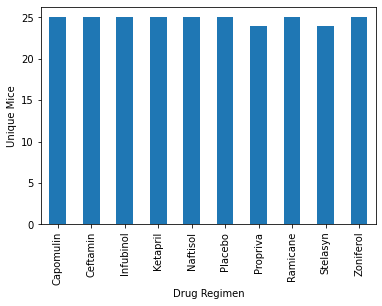

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#drug_summary.plot(x=drug_summary.index.values, y=drug_summary['Unique Mice'], kind="bar", title="Unique Mice Subjects Per Drug Regimen", xlabel="Drug Regimen")

drug_mouse = drug_summary['Unique Mice']

drug_mouse.plot(kind='bar', ylabel="Unique Mice")

<function matplotlib.pyplot.show(close=None, block=None)>

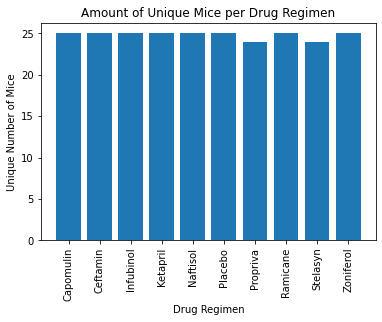

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_summary.index.values, drug_summary['Unique Mice'], align='center')
plt.xticks(rotation=90)
plt.title("Amount of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Number of Mice")
plt.show


<AxesSubplot:ylabel='Mouse ID'>

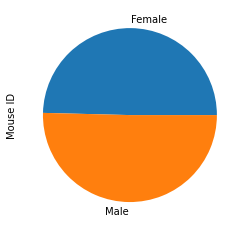

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_data.groupby(mouse_data['Sex'], as_index=True)['Mouse ID'].nunique()

mouse_sex.plot(y='Mouse ID', kind='pie')

In [13]:
mouse_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Mouse Sex Ratio')

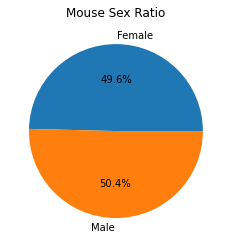

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyp
plt.pie(mouse_sex, labels=mouse_sex.index.values, autopct="%1.1f%%")
plt.title("Mouse Sex Ratio")


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#car_data = car_data.loc[car_data['horsepower'] != "?"]
#tumor_last = mouse_data.loc[mouse_data['Timepoint'] == 45]
#tumor_last = tumor_last[['Mouse ID', 'Tumor Volume (mm3)']]
#tumor_last.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#tumor_data = mouse_data.merge(tumor_last, how='inner', on=['Mouse ID'])

#tumor_data = tumor_data.loc[tumor_data['Timepoint'] == 45, :]

#high_time = mouse_data['Timepoint'].max()

find_high_time = mouse_data.groupby(mouse_data['Mouse ID'])['Timepoint'].max().to_frame()

find_high_time = find_high_time.merge(mouse_data, how='left', on='Mouse ID')

#wrong_timepoint = find_high_time[find_high_time['Timepoint_x'] != ['Timepoint_y']].index

#find_high_time = find_high_time.drop(['Timepoint_x'] != ['Timepoint_y'])

#find_high_time = find_high_time.groupby(find_high_time['Mouse ID', 'Timepoint_x'], as_index=True)
#df = df[df['S'] != df['T']]
find_high_time = find_high_time[find_high_time['Timepoint_x'] == find_high_time['Timepoint_y']]

#find_high_time

tumor_data = find_high_time.copy()
tumor_data


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,10,48.710661,0
1849,z578,45,Ramicane,Male,11,16,45,30.638696,0
1859,z581,45,Infubinol,Female,24,25,45,62.754451,3
1869,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_data = []
ram_data = []
inf_data = []
cef_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#print(f"Values below {lower_bound} could be outliers for the entire test.")
#print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

only_cap = tumor_data.loc[tumor_data['Drug Regimen'] == 'Capomulin', :]
cap_values = only_cap['Tumor Volume (mm3)']
cap_data = cap_values.tolist()

only_ram = tumor_data.loc[tumor_data['Drug Regimen'] == 'Ramicane', :]
ram_values = only_ram['Tumor Volume (mm3)']
ram_data = ram_values.tolist()

only_inf = tumor_data.loc[tumor_data['Drug Regimen'] == 'Infubinol', :]
inf_values = only_inf['Tumor Volume (mm3)']
inf_data = inf_values.tolist()

only_cef = tumor_data.loc[tumor_data['Drug Regimen'] == 'Ceftamin', :]
cef_values = only_cef['Tumor Volume (mm3)']
cef_data = cef_values.tolist()

    # add subset 
#print(len(cap_data))
#print(len(ram_data))
#print(len(inf_data))
#print(len(cef_data))

box_test_dict = {"Capomulin": cap_data, "Ramicane": ram_data, "Infubinol": inf_data, "Ceftamin": cef_data}



box_test = pd.DataFrame(data=box_test_dict)
box_test
    
    # Determine outliers using upper and lower bounds
#cap_data

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [111]:
### EXTERNALITY CHECK PER DRUCG ###
capomulin = box_test['Capomulin']
ramicane = box_test['Ramicane']
infubinol = box_test['Infubinol']
ceftamin = box_test['Ceftamin']

## CAPOMULIN TEST

quartiles_cap = capomulin.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {round(lower_bound_cap, 3)} could be outliers for Capomulin.")
print(f"Values above {round(upper_bound_cap, 3)} could be outliers for Capomulin.")

## RAMICANE TEST

quartiles_ram = ramicane.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {round(lower_bound_ram, 3)} could be outliers for Ramicane.")
print(f"Values above {round(upper_bound_ram, 3)} could be outliers for Ramicane.")

## INFUBINOL TEST

quartiles_inf = infubinol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {round(lower_bound_inf, 3)} could be outliers for Infubinol.")
print(f"Values above {round(upper_bound_inf, 3)} could be outliers for Infubinol.")

## CEFTAMIN TEST

quartiles_cef = ceftamin.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {round(lower_bound_cef, 3)} could be outliers for Ceftamin.")
print(f"Values above {round(upper_bound_cef, 3)} could be outliers for Ceftamin.")

Values below 20.705 could be outliers for Capomulin.
Values above 51.832 could be outliers for Capomulin.
Values below 17.913 could be outliers for Ramicane.
Values above 54.307 could be outliers for Ramicane.
Values below 36.833 could be outliers for Infubinol.
Values above 82.741 could be outliers for Infubinol.
Values below 25.355 could be outliers for Ceftamin.
Values above 87.666 could be outliers for Ceftamin.


Capomulin    float64
Ramicane     float64
Infubinol    float64
Ceftamin     float64
dtype: object

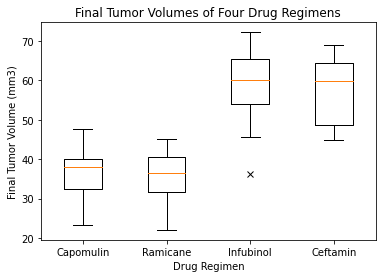

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#plt.boxplot(cap_values)
#fig1, ax2 = plt.subplots()
#plt.boxplot(ram_values)
#fig1, ax3 = plt.subplots()
#plt.boxplot(inf_values)
#fig1, ax4 = plt.subplots()

#fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
#ax7.boxplot(data)

#plt.show()

### REDO WITH MATPLOTLIB ###
cap = box_test['Capomulin']
ram = box_test['Ramicane']
inf = box_test['Infubinol']
cef = box_test['Ceftamin']

plot_data = [cap, ram, inf, cef]
tick_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

flierprops = dict(marker='x', markerfacecolor='r')

plt.boxplot(plot_data, flierprops=flierprops)
plt.title('Final Tumor Volumes of Four Drug Regimens')
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

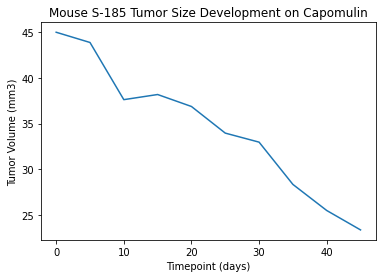

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_line = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin', :]

s185 = cap_line.loc[cap_line['Mouse ID'] == 's185', :]

x = s185['Timepoint']
y = s185['Tumor Volume (mm3)']

plt.plot(x, y)
plt.title("Mouse S-185 Tumor Size Development on Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
#cap_line
#s185


Text(0, 0.5, 'Average Tumor Volume (mm3)')

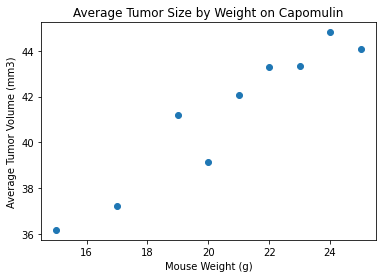

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_scatter = cap_line.groupby(cap_line['Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
cap_scatter

scatter_x = cap_scatter['Weight (g)']
scatter_y = cap_scatter['Tumor Volume (mm3)']



plt.scatter(scatter_x, scatter_y)
plt.title('Average Tumor Size by Weight on Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = sts.pearsonr(scatter_x, scatter_y)
print(f"The Correlation between Weight and Average Tumor Size is {round(correlation[0],2)}")

The Correlation between Weight and Average Tumor Size is 0.95


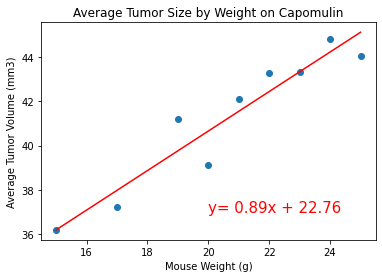

In [104]:
### Regression

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(scatter_x, scatter_y)

regress_values = scatter_x * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(scatter_x, scatter_y)
plt.title('Average Tumor Size by Weight on Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(scatter_x, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.show()